## 1. Data Understanding

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
listings_df = pd.read_csv('data/listings.csv')
calendar_df = pd.read_csv('data/calendar.csv')
reviews_df = pd.read_csv('data/reviews.csv')

In [3]:
listings_df.shape, calendar_df.shape, reviews_df.shape

((3818, 92), (1393570, 4), (84849, 6))

In [4]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [7]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
listings_df['number_of_reviews'].value_counts()

0      627
1      310
2      224
4      160
3      157
      ... 
179      1
138      1
190      1
270      1
128      1
Name: number_of_reviews, Length: 195, dtype: int64

In [9]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [10]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [11]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## 2. Prepare data:

#### Calendar data

In [12]:
# Convert date from string to datetime object
calendar_df['date'] = calendar_df['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [13]:
# Convert price from string to float

def clean_price(x):
    '''
    Converts price from string to float by removing the '$' symbol and ',' .
    Returns the price as float 
    '''
    if type(x) != float:
        x = str(x).strip('$')
        x = float(x.replace(',', ''))
    return x

# r1 = clean_price('$1,250.00')
# r2 = clean_price(calendar_df['price'].loc[2])
# r1, r2, type(r1), type(r2)

calendar_df['price'] = calendar_df['price'].apply(clean_price)
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [14]:
calendar_df.describe()

,listing_id,price
count,1.393570e+06,934542.000000
mean,5.550111e+06,137.944859
std,2.962274e+06,105.062870
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,1650.000000


#### listings data

In [15]:
listings_df.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [16]:
# extract required columns

host_listing = listings_df[['id', 'name', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
        'room_type', 'accommodates', 'price', 'number_of_reviews', 'review_scores_accuracy']]
host_listing.isnull().sum()

id                                0
name                              0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
room_type                         0
accommodates                      0
price                             0
number_of_reviews                 0
review_scores_accuracy          658
dtype: int64

columns 'neighbourhood_cleansed' and 'neighbourhood_group_cleansed' are preferred to other nighbouhood related columns as these columns have no null values.
Only column 'review_scores_accuracy' contains NaN values. Its not removed as only the top rated values are going to be used.

In [17]:
host_listing.head()

,id,name,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_accuracy
0,241032,Stylish Queen Anne Apartment,West Queen Anne,Queen Anne,Entire home/apt,4,$85.00,207,10.0
1,953595,Bright & Airy Queen Anne Apartment,West Queen Anne,Queen Anne,Entire home/apt,4,$150.00,43,10.0
2,3308979,New Modern House-Amazing water view,West Queen Anne,Queen Anne,Entire home/apt,11,$975.00,20,10.0
3,7421966,Queen Anne Chateau,West Queen Anne,Queen Anne,Entire home/apt,3,$100.00,0,NaN
4,278830,Charming craftsman 3 bdm house,West Queen Anne,Queen Anne,Entire home/apt,6,$450.00,38,9.0


In [18]:
host_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3818 non-null   int64  
 1   name                          3818 non-null   object 
 2   neighbourhood_cleansed        3818 non-null   object 
 3   neighbourhood_group_cleansed  3818 non-null   object 
 4   room_type                     3818 non-null   object 
 5   accommodates                  3818 non-null   int64  
 6   price                         3818 non-null   object 
 7   number_of_reviews             3818 non-null   int64  
 8   review_scores_accuracy        3160 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 268.6+ KB


In [19]:
# Convert price from string to float
host_listing['price'] = host_listing['price'].apply(clean_price)
host_listing.head()

/tmp/ipykernel_226007/4094027244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_listing['price'] = host_listing['price'].apply(clean_price)


,id,name,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_accuracy
0,241032,Stylish Queen Anne Apartment,West Queen Anne,Queen Anne,Entire home/apt,4,85.0,207,10.0
1,953595,Bright & Airy Queen Anne Apartment,West Queen Anne,Queen Anne,Entire home/apt,4,150.0,43,10.0
2,3308979,New Modern House-Amazing water view,West Queen Anne,Queen Anne,Entire home/apt,11,975.0,20,10.0
3,7421966,Queen Anne Chateau,West Queen Anne,Queen Anne,Entire home/apt,3,100.0,0,NaN
4,278830,Charming craftsman 3 bdm house,West Queen Anne,Queen Anne,Entire home/apt,6,450.0,38,9.0


## 3. Analysis & Visualization

### Q1. Is there any variation in booking price according to season?

Text(0, 0.5, 'Average Price')

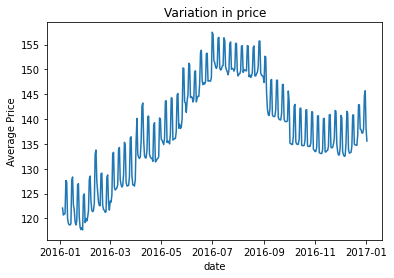

In [20]:
available_df = calendar_df[calendar_df['available']=='t'].reset_index(drop=True)
price_mean = available_df.groupby('date')['price'].mean().reset_index()

sns.lineplot(x='date', y='price', data = price_mean)
plt.title('Variation in price')
plt.ylabel('Average Price')
# plt.xticks(rotation=90)

* The small spikes in the plot shows the seasonality in average booking price. This is an indication of price hike during the weekends.
* Also there is an upward and downward trend.

In [21]:

monthly_avg = available_df.groupby(pd.Grouper(key='date', freq='1M')).mean().reset_index()
# monthly_avg['date'] = monthly_avg['date'].apply(lambda x: f'{x.year}-{x.month:02d}')
monthly_avg[['date', 'price']]

,date,price
0,2016-01-31,121.568409
1,2016-02-29,124.293927
2,2016-03-31,128.644488
3,2016-04-30,135.097005
4,2016-05-31,139.538183
5,2016-06-30,147.473137
6,2016-07-31,152.094150
7,2016-08-31,150.656594
8,2016-09-30,143.255949
9,2016-10-31,137.031939


Text(0, 0.5, 'Average Price')

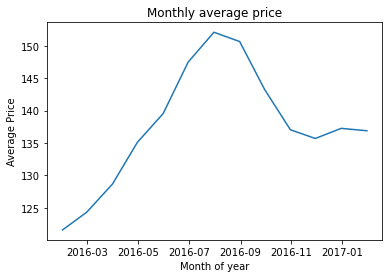

In [22]:
sns.lineplot(x='date', y='price', data = monthly_avg)
plt.title('Monthly average price')
plt.xlabel('Month of year')
plt.ylabel('Average Price')
# plt.xticks(rotation=90)

* There is an upward trend in average price till July 2016 and then a downward trend till Nov 2016. After that there is not much variation in average price.

### Q2. Best time to visit Seattle

In [23]:
id_count = available_df.groupby(pd.Grouper(key='date', freq='1M')).nunique().reset_index()#.apply(lambda x: len(x.month)).reset_index()
id_count

,date,listing_id,available,price
0,2016-01-31,2868,1,344
1,2016-02-29,2895,1,392
2,2016-03-31,2950,1,425
3,2016-04-30,3002,1,445
4,2016-05-31,2705,1,435
5,2016-06-30,2720,1,486
6,2016-07-31,2503,1,463
7,2016-08-31,2561,1,452
8,2016-09-30,2649,1,401
9,2016-10-31,2694,1,353


Text(0.5, 0, 'Month of year')

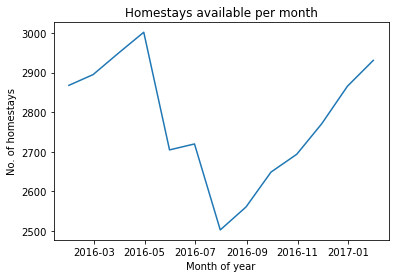

In [24]:
sns.lineplot(x='date', y='listing_id', data = id_count)
plt.title('Homestays available per month')
plt.ylabel('No. of homestays')
plt.xlabel('Month of year')
# plt.xticks(rotation=90)

Here we can see that the number listings available for booking is lowest during July and August. And from the previous plot, we can see that the price is also at highest during these period. 
During March and April, there are more listings available for booking and the price is also camparatively low.

### Q3. Which is the most preferred neighbourhood in Seattle?

In [25]:
host_listing.head()

,id,name,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_accuracy
0,241032,Stylish Queen Anne Apartment,West Queen Anne,Queen Anne,Entire home/apt,4,85.0,207,10.0
1,953595,Bright & Airy Queen Anne Apartment,West Queen Anne,Queen Anne,Entire home/apt,4,150.0,43,10.0
2,3308979,New Modern House-Amazing water view,West Queen Anne,Queen Anne,Entire home/apt,11,975.0,20,10.0
3,7421966,Queen Anne Chateau,West Queen Anne,Queen Anne,Entire home/apt,3,100.0,0,NaN
4,278830,Charming craftsman 3 bdm house,West Queen Anne,Queen Anne,Entire home/apt,6,450.0,38,9.0


In [26]:
host_listing.describe()

,id,accommodates,price,number_of_reviews,review_scores_accuracy
count,3.818000e+03,3818.000000,3818.000000,3818.000000,3160.000000
mean,5.550111e+06,3.349398,127.976166,22.223415,9.636392
std,2.962660e+06,1.977599,90.250022,37.730892,0.698031
min,3.335000e+03,1.000000,20.000000,0.000000,2.000000
25%,3.258256e+06,2.000000,75.000000,2.000000,9.000000
50%,6.118244e+06,3.000000,100.000000,9.000000,10.000000
75%,8.035127e+06,4.000000,150.000000,26.000000,10.000000
max,1.034016e+07,16.000000,1000.000000,474.000000,10.000000


In [27]:
host_listing['review_scores_accuracy'].value_counts()

10.0    2261
9.0      730
8.0      129
6.0       19
7.0       15
4.0        4
2.0        2
Name: review_scores_accuracy, dtype: int64

/tmp/ipykernel_226007/3826491534.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp_df = host_listing.groupby(['neighbourhood_cleansed'])['number_of_reviews', 'review_scores_accuracy'].mean()


,neighbourhood_cleansed,number_of_reviews,review_scores_accuracy,avg_accuracy
0,International District,83.411765,9.846154,98.461538
1,Harrison/Denny-Blaine,54.500000,9.833333,98.333333
2,Whittier Heights,50.307692,9.750000,97.500000
3,Riverview,48.625000,9.875000,98.750000
4,South Delridge,48.333333,9.800000,98.000000
5,Georgetown,35.750000,9.375000,93.750000
6,Montlake,34.736842,9.750000,97.500000
7,Pioneer Square,34.608696,9.363636,93.636364
8,Fauntleroy,34.400000,9.777778,97.777778
9,West Woodland,33.937500,9.740741,97.407407


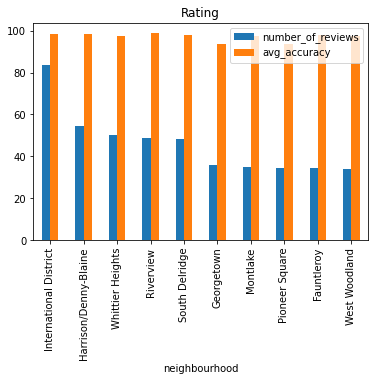

In [28]:
grp_df = host_listing.groupby(['neighbourhood_cleansed'])['number_of_reviews', 'review_scores_accuracy'].mean()

grp_df_sorted = grp_df.sort_values(['number_of_reviews', 'review_scores_accuracy'], ascending=[False, False])
top_10 = grp_df_sorted.head(10).reset_index()

# avg_accuracy on 100
top_10['avg_accuracy'] = top_10['review_scores_accuracy'] * 10

count_plot = top_10.plot(x='neighbourhood_cleansed', y=['number_of_reviews', 'avg_accuracy'], kind='bar', title='Rating', rot=90) 
count_plot.set_xlabel('neighbourhood')

top_10

* International District is the most preferred neighbourhoods.

### Q4. Which are the most and least expensive areas?

,neighbourhood_group_cleansed,price
5,Delridge,83.278481
10,Northgate,88.550000
13,Rainier Valley,91.899371
8,Lake City,92.671642
15,University District,93.639344
1,Beacon Hill,94.669492
14,Seward Park,108.477273
7,Interbay,109.727273
11,Other neighborhoods,119.968514
0,Ballard,124.682609


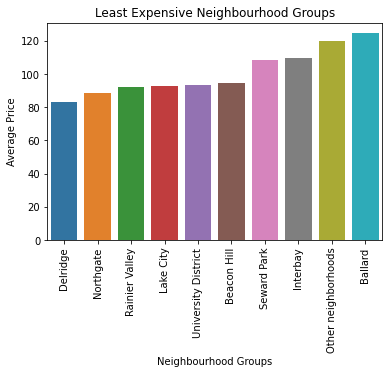

In [29]:
price_df =  host_listing.groupby(['neighbourhood_group_cleansed'])['price'].mean().reset_index().sort_values(['price'])
# price_df.head(10), price_df.tail()

# Least expensive neighbourhood_groups
sns.barplot(x='neighbourhood_group_cleansed', y='price', data=price_df.head(10))
plt.title('Least Expensive Neighbourhood Groups')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
price_df.head(10)

* Delridge and Northgate are the cheapest neighbourhood groups.

,neighbourhood_group_cleansed,price
9,Magnolia,177.672131
12,Queen Anne,157.223729
6,Downtown,154.405660
16,West Seattle,141.359606
3,Cascade,140.101124
2,Capitol Hill,130.592593
4,Central Area,128.338753
0,Ballard,124.682609
11,Other neighborhoods,119.968514
7,Interbay,109.727273


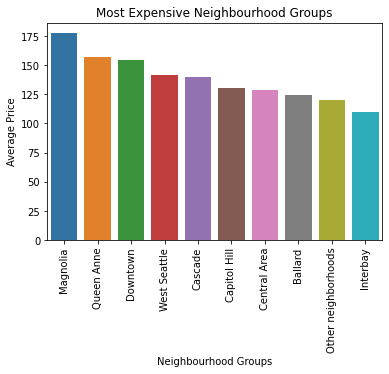

In [30]:
# Expensive neighbourhood_groups
expensive_df = price_df.tail(10).sort_values('price', ascending=False)
sns.barplot(x='neighbourhood_group_cleansed', y='price', data=expensive_df)
plt.title('Most Expensive Neighbourhood Groups')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
expensive_df

* Magnolia and Queen Anne are most expensive neighbourhood groups